**Описание данных**

Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`City`|город проживания клиента|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`estimated_salary`|заработная плата клиента|

Подключение библиотек

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

чтение данных

In [6]:
df = pd.read_csv('clients_bank.csv')
df.head(2)

,userid,score,City,Gender,Age,Objects,Balance,Products,estimated_salary
0,15677338,619,Ярославль,Ж,42,2,NaN,1,101348.88
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,112542.58


## Знакомство с данными



просмотр общей информации

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB


### описательная статистика

In [6]:

per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles=per)

,userid,score,Age,Objects,Balance,Products,estimated_salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,57510.492818
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,11.580000
1%,1.561124e+07,432.000000,21.000000,0.000000,47505.449000,1.000000,1842.825300
5%,1.562156e+07,489.000000,25.000000,1.000000,70367.943000,1.000000,9851.818500
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,51002.110000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,100193.915000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,149388.247500
95%,1.584577e+07,812.000000,60.000000,9.000000,169984.256000,2.000000,190155.375500


просмотр уникальных значений текстовых признаков

In [7]:

for col in df.select_dtypes('object'):
    print(f'Признак --{col}---')
    print(df[col].unique())
    print()

Признак --City---
['Ярославль' 'Рыбинск' 'Ростов Великий']

Признак --Gender---
['Ж' 'М']



список непрерывных признаков

In [4]:

lst_var_cont = ['score', 'Age', 'Balance', 'estimated_salary']

список дискретных признаков

In [12]:

lst_var_disc = ['City', 'Objects', 'Products', 'Gender']


2.3 Для каждого из категориальных признаков:
- рассчитайте моду;
- постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем);
- на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;   

Найдем моду для категориальных(дискретных) признаков

In [13]:
modes = df[lst_var_disc].mode().iloc[0]
print(modes)

City        Ярославль
Objects             2
Products            1
Gender              М
Name: 0, dtype: object


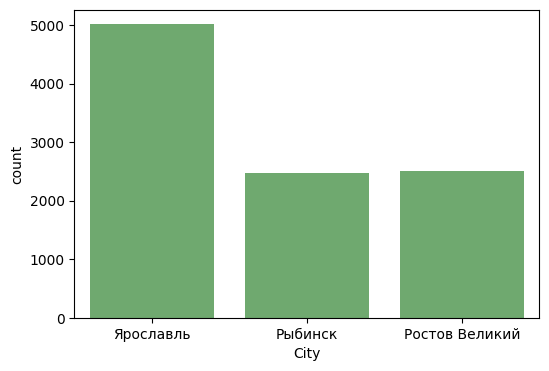

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df,
                   x='City',
                   color='green',
                   alpha=0.6,
                   legend='full')


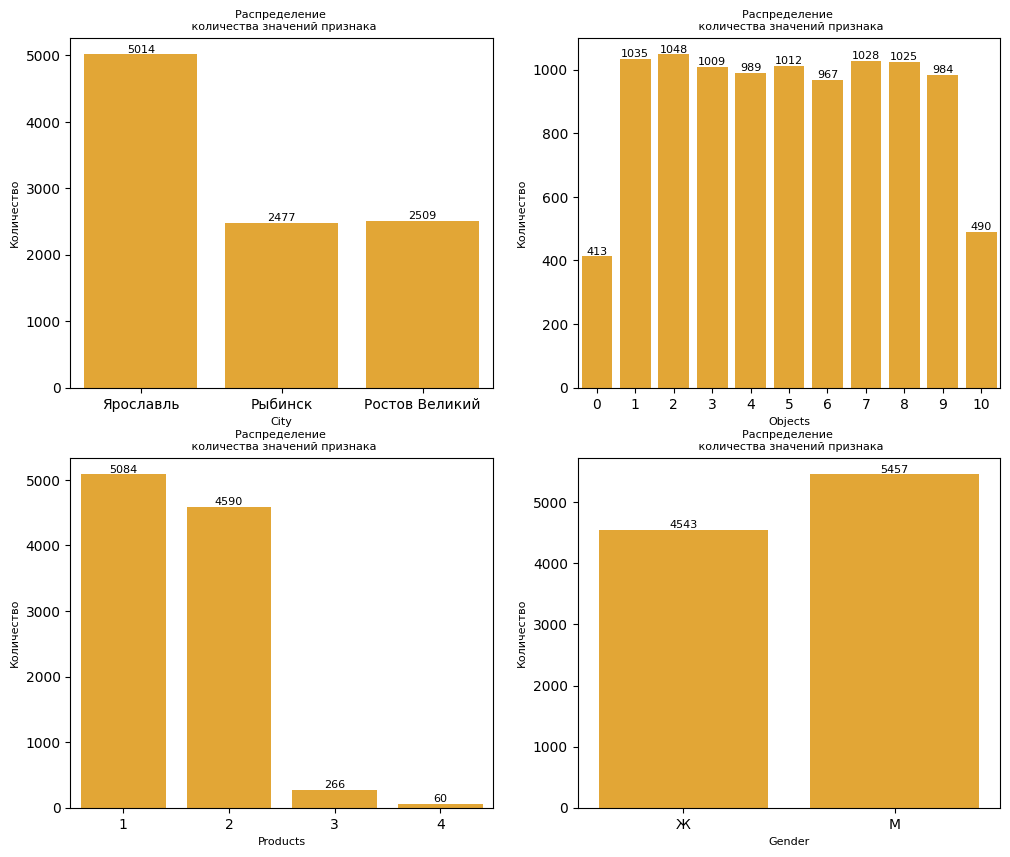

In [ ]:
plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(lst_var_disc, start=1):
    plt.subplot(2,2, i)
    ax = sns.countplot(x=df[col],
                       color= 'orange',
                       alpha=0.9,
                       legend='full');
    ax.set_xlabel(col, fontsize=8);
    ax.set_ylabel('Количество', fontsize=8);
    ax.set_title('Распределение \n количества значений признака', fontsize=8);
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)


2.4 Для каждого из непрерывных признаков:
- рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов;
- постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой;
- постройте плотность распределения и гистограмму;
- объедините на одном графике плотность распределения и вертикальные линии статистик.

In [33]:
per = [0.01, 0.05, 0.95, 0.99]

df[lst_var_cont].describe(percentiles=per)

,score,Age,Balance,estimated_salary
count,10000.000000,10000.000000,6383.000000,10000.000000
mean,650.528800,38.921800,119827.493793,100090.239881
std,96.653299,10.487806,30095.056462,57510.492818
min,350.000000,18.000000,3768.690000,11.580000
1%,432.000000,21.000000,47505.449000,1842.825300
5%,489.000000,25.000000,70367.943000,9851.818500
50%,652.000000,37.000000,119839.690000,100193.915000
95%,812.000000,60.000000,169984.256000,190155.375500
99%,850.000000,72.000000,190495.170600,198069.734500
max,850.000000,92.000000,250898.090000,199992.480000


In [32]:
for col in lst_var_cont:
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    l_level = q1 - 1.5*iqr
    r_level = q3 + 1.5*iqr
    print(f'У признака {col} нижний ус= {l_level} ,верхний ус= {r_level}')

У признака score нижний ус= 383.0 ,верхний ус= 919.0
У признака Age нижний ус= 14.0 ,верхний ус= 62.0
У признака Balance нижний ус= 41186.5025 ,верхний ус= 198507.7625
У признака estimated_salary нижний ус= -96577.09624999999 ,верхний ус= 296967.45375


In [ ]:
#для подсчета значений нижнего и верхнего усов была предложена следующая функция
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

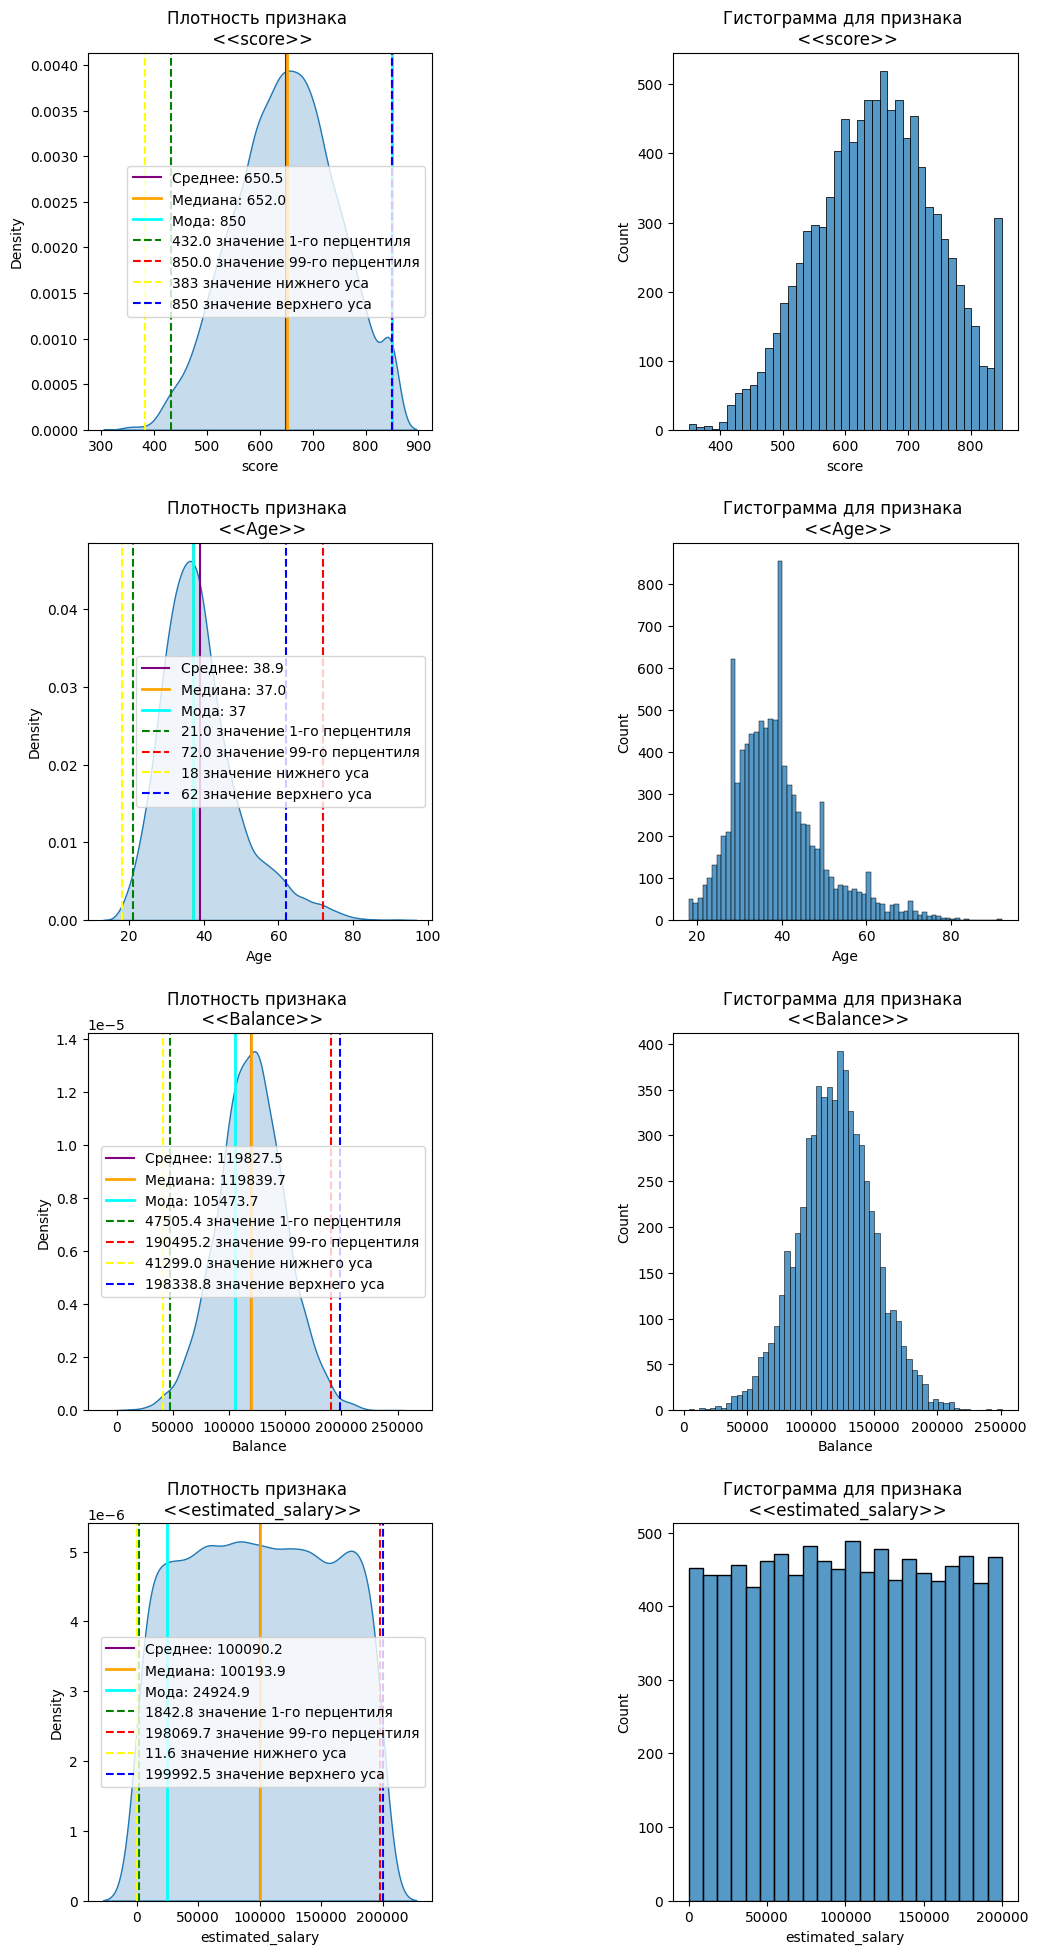

In [ ]:
plt.subplots(4,2, figsize=(12,24), gridspec_kw={'wspace': 0.7,
                                                'hspace': 0.3})
for index, col in enumerate(lst_var_cont):
   plt.subplot(4,2, 2*index+1)
   ax_2 = sns.kdeplot(df[col], fill=True);
   plt.title(f'Плотность признака \n <<{col}>>')
   per_1 = np.nanpercentile(df[col], 1)
   per_99 = np.nanpercentile(df[col], 99) 
   low_wish, hi_wish = calc_boxplot(df[col])
   mean = np.nanmean(df[col]) 
   median = np.nanmedian(df[col])  
   mode = df[col].mode().iloc[0]  
   ax_2.axvline(mean, color='purple', 
                linestyle='-',
                label=f'Среднее: {np.round(mean,1)}')
   ax_2.axvline(median, color='orange', 
                linestyle='-',
                label=f'Медиана: {np.round(median,1)}')
   ax_2.axvline(mode, color='cyan', 
                linestyle='-',
                label=f'Мода: {np.round(mode,1)}')
   ax_2.axvline(per_1,
                color='green',
                linestyle='--',
                label=f'{np.round(per_1,1)} значение 1-го перцентиля')
   ax_2.axvline(per_99,
                color='red',
                linestyle='--',
                label=f'{np.round(per_99,1)} значение 99-го перцентиля')
   ax_2.axvline(low_wish,
                color='yellow',
                linestyle='--',
                label=f'{np.round(low_wish,1)} значение нижнего уса')

   ax_2.axvline(hi_wish,
                color='blue',
                linestyle='--',
                label=f'{np.round(hi_wish,1)} значение верхнего уса')
   plt.legend()  
   #  - гистограмма
   plt.subplot(4,2, 2*index+2)
   ax_1 = sns.histplot(df[col]);
                        #kde=True);
   plt.title(f'Гистограмма для признака \n <<{col}>>')

   
   
  
   
   